## Polynomial Regression:

In [21]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Importing the dataset
dataset = pd.read_csv('position_salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [23]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
X, y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

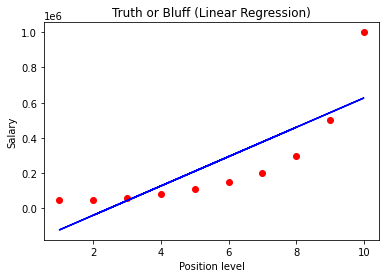

In [26]:
# Visualizing the Linear Regression results
plt.scatter(X, y, color='red')
plt.plot(X_train, lin_reg.predict(X_train), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [27]:
# Predicting a new result with Linear Regression
lin_reg.predict([[5.5]])

array([252274.95107632])

In [28]:
# Predicting a new result with Linear Regression
y_pred = lin_reg.predict(X_test)
y_pred

array([ 44275.9295499 , 543473.58121331])

In [29]:
# Calculating R^2 for the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9779215014976274

#### Polynomial Regression

In [30]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree= 4)
  
# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
X_train, X_train_poly

(array([[ 5],
        [10],
        [ 2],
        [ 7],
        [ 8],
        [ 4],
        [ 1],
        [ 6]]),
 array([[1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
        [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
        [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
        [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
        [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
        [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
        [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
        [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03]]))

In [31]:
# fit the transformed features to Linear Regression
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

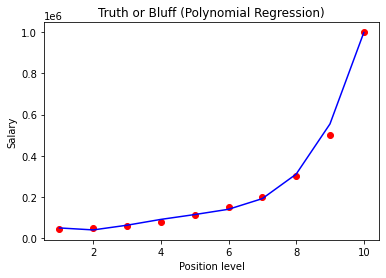

In [32]:
# Visualizing the Polymonial Regression results
plt.scatter(X, y, color='red')
plt.plot(X, poly_reg.predict(poly_features.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [33]:
# predicting on training data-set
y_train_pred = poly_reg.predict(X_train_poly)
y_train_pred

array([114333.04512588, 998396.28808584,  39737.47907992, 191766.33326152,
       310607.85933287,  90848.71741527,  49317.36159873, 139992.91609996])

In [34]:
# predicting on test data-set
y_test_pred = poly_reg.predict(poly_features.fit_transform(X_test))
y_test_pred

array([ 62618.48984241, 554488.61683466])

In [35]:
# evaluating the model on training dataset
# Calculating R^2 for the accuracy of the model
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.999231851781535

In [36]:
# evaluating the model on training dataset
# Calculating R^2 for the accuracy of the model
r2_train = r2_score(y_test, y_test_pred)
r2_train

0.9692575841569272

### New Data
#### FuelConsumption.csv

In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


For regression purpose we are going to select some important features

In [39]:
imf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
imf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [40]:
X = imf.iloc[:,0:3]
y = imf.iloc[:,3]

In [41]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [42]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predicting a new result with Linear Regression
y_pred = lin_reg.predict(X_test)
y_pred

array([335.34171536, 209.99794075, 218.19014703, 229.58030242,
       194.80328229, 296.7675563 , 210.90818589, 265.77495329,
       207.26720532, 320.29049345, 280.33887556, 382.66709862,
       224.95735844, 292.21633059, 185.35696778, 279.26510792,
       349.76956523, 205.94137882, 254.57250262, 379.54496406,
       195.57745502, 229.99588379, 251.8417672 , 217.98235635,
       180.23936001, 261.36716412, 267.24421634, 359.35931629,
       291.64994854, 166.09838324, 337.4417146 , 223.02088169,
       285.52083746, 243.16226128, 195.57745502, 195.01843711,
       313.14460472, 214.54916646, 224.49014475, 250.30078587,
       192.8467196 , 192.8467196 , 207.26720532, 187.94426665,
       311.67534167, 200.68769864, 230.02333388, 188.64672111,
       387.5769157 , 371.21668537, 318.54172144, 321.57941591,
       271.23642414, 171.00083618, 218.19014703, 188.64672111,
       295.50608393, 182.83402303, 253.73397576, 205.23892436,
       199.56966282, 209.36720456, 211.61064035, 359.35

In [44]:
# Calculating R^2 for the accuracy of the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8539151785005095

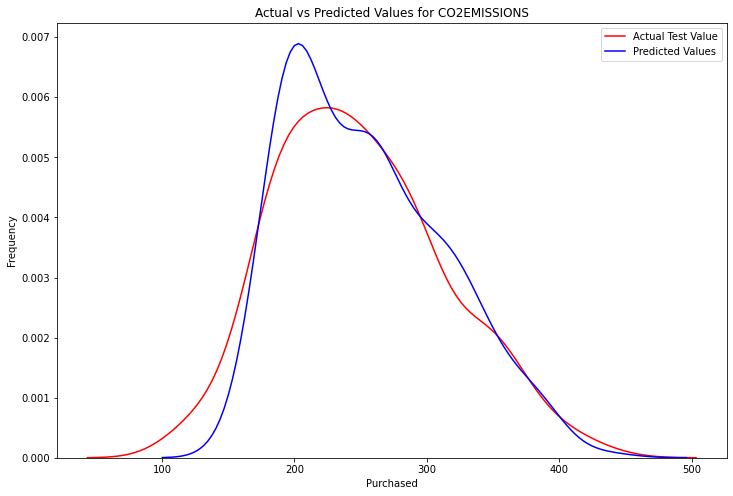

In [45]:
import seaborn as sns

# visualization with density plot
plt.figure(figsize=(12, 8))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Test Value")
ax1 = sns.distplot(y_pred, hist=False, color="b", label="Predicted Values")

plt.title('Actual vs Predicted Values for CO2EMISSIONS') 
plt.xlabel('Purchased') 
plt.ylabel('Frequency')
plt.show() 
plt.close()

#### Polynomial Reg

In [46]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree= 4)
  
# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)


In [47]:
# fit the transformed features to Linear Regression
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [48]:
# predicting on test data-set
y_pred = poly_reg.predict(poly_features.fit_transform(X_test))
y_pred

array([354.57143783, 211.5124707 , 231.07927833, 217.31333444,
       162.73792647, 293.27352407, 213.81582958, 273.4019393 ,
       204.42846809, 329.76347781, 285.45437349, 365.92605894,
       196.8664075 , 279.33315769, 177.2138782 , 249.77553445,
       350.77537086, 223.22019679, 254.77499817, 385.91406706,
       192.34584803, 192.13628894, 248.56002714, 233.58938106,
       121.11388257, 281.15566302, 273.35112127, 360.27369189,
       254.74355938, 141.78877331, 358.67166446, 242.13893727,
       282.9606826 , 246.7017472 , 192.34584803, 196.49939636,
       295.36243877, 222.71368708, 246.85550666, 240.74565376,
       186.47777274, 186.47777274, 204.42846809, 171.54768811,
       297.31012219, 198.62754185, 254.7098899 , 181.41323457,
       339.26903246, 352.17706398, 333.69649391, 252.12907244,
       280.26375198, 147.54597443, 231.07927833, 181.41323457,
       280.87198622, 165.96839322, 262.55616528, 208.2076167 ,
       207.52663655, 207.19349927, 221.16001082, 360.27

In [49]:
# evaluating the model on training dataset
# Calculating R^2 for the accuracy of the model
r2_test = r2_score(y_test, y_pred)
r2_test

0.9303978181425802

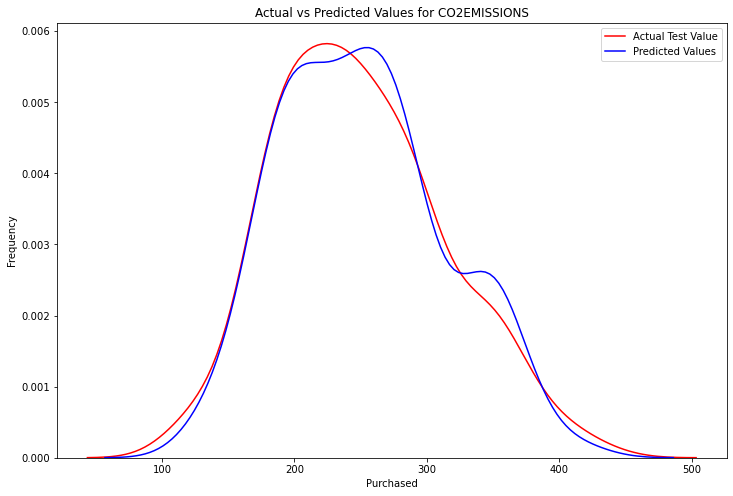

In [50]:
import seaborn as sns

# visualization with density plot
plt.figure(figsize=(12, 8))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Test Value")
ax1 = sns.distplot(y_pred, hist=False, color="b", label="Predicted Values")

plt.title('Actual vs Predicted Values for CO2EMISSIONS') 
plt.xlabel('Purchased') 
plt.ylabel('Frequency')
plt.show() 
plt.close()